### 4000 sample size

In [171]:
import pandas as pd

# Specify the file path
file_path = 'D:\\PersonalProjs\\osu!\\archive\\data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
df = df.drop(columns=['source_id', 'author', 'published_at', 'url_to_image', 'url' ])


filtered_df = df[df['source_name'].isin(['GlobeNewswire', 'The Times of India'])]

filtered_df['relevant'] = filtered_df['category'].apply(lambda x: 1 if x == 'COVID' else 0)
df_cleaned = filtered_df.dropna(subset=['full_content'])
df_relevant_zero = df_cleaned[df_cleaned['relevant'] == 0]
df_relevant_one = df_cleaned[df_cleaned['relevant'] == 1]
df_sampled = df_relevant_zero.sample(n=1400, random_state=42)
balanced_df = pd.concat([df_sampled, df_relevant_one], ignore_index=True)


C:\Users\ianwa\AppData\Local\Temp\ipykernel_42652\848721970.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['relevant'] = filtered_df['category'].apply(lambda x: 1 if x == 'COVID' else 0)


### 100k sample size

In [170]:
import pandas as pd

# Specify the file path
file_path = 'D:\\PersonalProjs\\osu!\\archive\\data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
df = df.drop(columns=['source_id', 'author', 'published_at', 'url_to_image', 'url' ])
filtered_df = df
filtered_df['relevant'] = filtered_df['category'].apply(lambda x: 1 if x == 'COVID' else 0)
df_cleaned = filtered_df.dropna(subset=['full_content'])
balanced_df = df_cleaned
balanced_df

# filtered_df = df[df['source_name'].isin(['GlobeNewswire', 'The Times of India'])]

# filtered_df['relevant'] = filtered_df['category'].apply(lambda x: 1 if x == 'COVID' else 0)
# df_cleaned = filtered_df.dropna(subset=['full_content'])
# df_relevant_zero = df_cleaned[df_cleaned['relevant'] == 0]
# df_relevant_one = df_cleaned[df_cleaned['relevant'] == 1]
# df_sampled = df_relevant_zero.sample(n=1400, random_state=42)
# balanced_df = pd.concat([df_sampled, df_relevant_one], ignore_index=True)


,article_id,source_name,title,description,content,category,full_content,relevant
0,89541,International Business Times,UN Chief Urges World To 'Stop The Madness' Of ...,UN Secretary-General Antonio Guterres urged th...,UN Secretary-General Antonio Guterres urged th...,Nepal,UN Secretary-General Antonio Guterres urged th...,0
1,89542,Prtimes.jp,RANDEBOOよりワンランク上の大人っぽさが漂うニットとベストが新登場。,[株式会社Ainer]\nRANDEBOO（ランデブー）では2023年7月18日(火)より公...,"RANDEBOO2023718()WEB2023 Autumn Winter \n""Nepa...",Nepal,NaN,0
2,89543,VOA News,UN Chief Urges World to 'Stop the Madness' of ...,UN Secretary-General Antonio Guterres urged th...,"Kathmandu, Nepal UN Secretary-General Antonio...",Nepal,NaN,0
3,89545,The Indian Express,Sikkim warning: Hydroelectricity push must be ...,Ecologists caution against the adverse effects...,At least 14 persons lost their lives and more ...,Nepal,At least 14 persons lost their lives and more ...,0
4,89547,The Times of Israel,"200 foreigners, dual nationals cut down in Ham...","France lost 35 citizens, Thailand 33, US 31, U...","Scores of foreign citizens were killed, taken ...",Nepal,NaN,0
...,...,...,...,...,...,...,...,...
105370,781108,The Indian Express,"Have done no wrong, only did party work, says ...",The High Court today allowed Shivakumar to wit...,Karnataka Deputy Chief Minister D K Shivakumar...,Home,Karnataka Deputy Chief Minister D K Shivakumar...,0
105371,781129,Forbes,FC Barcelona Guarantees $77.6 Million Champion...,FC Barcelona have guaranteed at least $77.6 mi...,FC Barcelona have guaranteed at least $767.6 m...,Home,FC Barcelona have guaranteed at least $767.6 m...,0
105372,781235,NPR,Three hospitals ignored her gravely ill fiancé...,"Forty years ago, Sarah Lubarsky came home from...",The photo from David and Sarah Lubarsky's wedd...,Home,The photo from David and Sarah Lubarsky's wedd...,0
105373,781240,Forbes,Kerber’s Farm: Bringing Farm To Table To Manha...,"A farmstand in Long Island, Kerber’s Farms has...",Kerbers Farm: Bringing Farm To Table To Manhat...,Home,Kerber’s Farm: Bringing Farm To Table To Manha...,0


In [168]:
df_cleaned = filtered_df.dropna(subset=['full_content'])
df['category'].value_counts()

category
Stock          3999
Health         2594
Finance        2402
Technology     2371
Real estate    2352
               ... 
Eritrea          14
Martinique       13
Cabo Verde       11
Réunion           9
Guadeloupe        4
Name: count, Length: 257, dtype: int64

In [172]:

balanced_df

,article_id,source_name,title,description,content,category,full_content,relevant
0,155465,The Times of India,Investing Lessons from ICC Cricket World Cup 2023,The factors determining the performance in two...,The scoreboard of the ICC World Cup of 2023 se...,Education,"Jimeet Modi CEO, Samco Ventures Modi believes ...",0
1,441303,The Times of India,9 reasons why ESG investing is getting popular,"ESG is an acronym for Environmental, Social, a...",As we start with Samvat 2080 and winter is aro...,Sustainability,"Dr. Poonam Tandon Chief Investment Officer, In...",0
2,177431,The Times of India,Info Edge Q2 Results: Profit rises 24% YoY to ...,Revenue from operations grew 11% to Rs 593 cro...,Info Edge reported 24% growth in its standalon...,Real estate,ETtech Info Edge reported 24% growth in its s...,0
3,646394,GlobeNewswire,Demand for Effective Packaging in the Food Ind...,The United Kingdom stands out as a promising h...,"NEWARK, Del, Nov. 23, 2023 (GLOBE NEWSWIRE) --...",YouTube,"NEWARK, Del, Nov. 23, 2023 (GLOBE NEWSWIRE) ...",0
4,208890,The Times of India,Inside pics; Khushi Kapoor's birthday celebration,Orhan Awatramani took to his Instagram stories...,"Who was Sam Manekshaw, the Indian Army Officer...",Instagram,"On November 5, Boney Kapoor and Sridevi’s youn...",0
...,...,...,...,...,...,...,...,...
2051,757435,GlobeNewswire,BioCryst Announces Approval of ORLADEYO® (bero...,"RESEARCH TRIANGLE PARK, N.C., Nov. 29, 2023 (G...","RESEARCH TRIANGLE PARK, N.C., Nov. 29, 2023 (G...",COVID,"RESEARCH TRIANGLE PARK, N.C., Nov. 29, 2023 ...",1
2052,757438,GlobeNewswire,Medical Literature Monitoring Services Market ...,"Companies covered in this report Clarivate, Te...","Jersey City, NJ, Nov. 29, 2023 (GLOBE NEWSWIRE...",COVID,"Jersey City, NJ, Nov. 29, 2023 (GLOBE NEWSWI...",1
2053,757439,GlobeNewswire,Ascendis Pharma Announces Strategic Partnershi...,– Teijin to receive exclusive license to fur...,Teijin to receive exclusive license to further...,COVID,– Teijin to receive exclusive license to fur...,1
2054,757447,The Times of India,Is there anything left in the market that is u...,“If the spending on elections allows the two-w...,"Deepak Shenoy, Founder, Capital Mind, says LIC...",COVID,"ETMarkets.com Deepak Shenoy , Founder, Capita...",1


In [17]:
counts = balanced_df.groupby(['source_name', 'relevant']).size().reset_index(name='count')
print(counts)

          source_name  relevant  count
0       GlobeNewswire         0    601
1       GlobeNewswire         1    448
2  The Times of India         0    799
3  The Times of India         1    208


In [129]:
from sklearn.model_selection import train_test_split

X = balanced_df['full_content']
y = balanced_df['relevant']

# Train test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3,  random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5,  random_state=42)

### Testing out SMOTE

In [9]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset
import re




X = balanced_df['full_content']
y = balanced_df['relevant']

# Oversampling minority classes using SMOTE
smote = SMOTE(random_state=42)
tfidf = TfidfVectorizer(max_features=10000, stop_words='english')
X_tfidf = tfidf.fit_transform(X)
X_smote, y_smote = smote.fit_resample(X_tfidf, y)
print("x_smote: ", X_smote)
print("y_smote: ", y_smote)
X_tfidf = tfidf.fit_transform(X)
X_smote, y_smote = smote.fit_resample(X_tfidf, y)

# Step 4: Stratified Splitting
X_train, X_temp, y_train, y_temp = train_test_split(X_smote, y_smote, test_size=0.3, stratify=y_smote, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)


#### Random Forest classifier

In [19]:
# Step 5: Encoding Strategies
# TF-IDF Vectorizer for classical models
X_train_tfidf = X_train
X_val_tfidf = X_val
X_test_tfidf = X_test

# Step 6: Baseline Model (Random Forest)
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_tfidf, y_train)
y_pred_rf = rf.predict(X_test_tfidf)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       210
           1       0.91      0.95      0.93       210

    accuracy                           0.93       420
   macro avg       0.93      0.93      0.93       420
weighted avg       0.93      0.93      0.93       420



### Classifier

In [60]:
import torch
import torch.nn as nn
from sentence_transformers import SentenceTransformer

class SentenceBertClassifier(nn.Module):
    def __init__(self, model_name='all-MiniLM-L6-v2', num_classes=2):
        super(SentenceBertClassifier, self).__init__()
        self.model = SentenceTransformer(model_name)  # Pre-trained Sentence-BERT model
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(self.model.get_sentence_embedding_dimension(), num_classes)  # Classification layer

    def forward(self, texts):
        embeddings = self.model.encode(texts, convert_to_tensor=True)  # Create embeddings
        embeddings = self.dropout(embeddings)
        return self.fc(embeddings)

### Testing Various Classifiers, with a) TFIDF Vectorizer b) Univ Sentence Encoder (USE) c) Both
1. Linear SVM
2. Logistic Regression (LR)
3. Naive Bayes
4. XGBoost
5. Random Forest

#### Initialization

In [ ]:
%pip install xgboost

In [128]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from timeit import default_timer as timer

svm_classifier = LinearSVC()
logistic_regression = LogisticRegression(max_iter=1000)
nb_classifier = MultinomialNB()
xgboost_classifier = XGBClassifier()
random_forest_classifier = RandomForestClassifier(n_estimators=100, max_depth=3, max_features='sqrt', min_samples_leaf=4, bootstrap=True, n_jobs=-1, random_state=0)

def evaluate_model(model, xtest, ytest):
    # Make predictions using the model
    y_pred = model.predict(xtest)

    # Calculate accuracy
    accuracy = accuracy_score(ytest, y_pred)
    # Calculate precision
    precision = precision_score(ytest, y_pred)
    # Calculate recall
    recall = recall_score(ytest, y_pred)
    # Calculate f1 score
    f1 = f1_score(ytest, y_pred)
    # Generate a classification report and confusion matrix
    report = classification_report(ytest, y_pred)
    cm = confusion_matrix(ytest, y_pred)
    return y_pred, accuracy, precision, recall, f1, report, cm


# Define batch size
batch_size = 1000

#### 1. TFIDF

In [130]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

start = timer()
tfidf_vectorizer_xtrain = []
for i in range(0, len(X_train), batch_size):
    batch_X_train = X_train[i:i + batch_size]
    batch_X_train_tfidf = tfidf_vectorizer.fit_transform(batch_X_train)
    tfidf_vectorizer_xtrain.extend(batch_X_train_tfidf.toarray())
print('Required time for embedding TFIDF with train data:- ', timer() - start) 


Required time for embedding TFIDF with train data:-  0.6446653000311926


##### Test data

In [132]:
start = timer()
tfidf_vectorizer_xtest = []
for i in range(0, len(X_test), batch_size):
    batch_X_test = X_test[i:i + batch_size]
    batch_X_test_tfidf = tfidf_vectorizer.transform(batch_X_test)
    tfidf_vectorizer_xtest.extend(batch_X_test_tfidf.toarray())
print('Required time for embedding TFIDF with train data:- ', timer() - start) 

Required time for embedding TFIDF with train data:-  0.13175189995672554


In [133]:
start = timer()
svm_tfidf = svm_classifier.fit(tfidf_vectorizer_xtrain, y_train)
print('Required time for training Linear SVM classifiers:- ', timer() - start) 
start = timer()
lr_tfidf = logistic_regression.fit(tfidf_vectorizer_xtrain, y_train)
print('Required time for training Logistic Regression classifiers:- ', timer() - start) 
start = timer()
nb_tfidf = nb_classifier.fit(tfidf_vectorizer_xtrain, y_train)
print('Required time for training Naive Bayes classifiers:- ', timer() - start) 
start = timer()
xgboost_tfidf = xgboost_classifier.fit(tfidf_vectorizer_xtrain, y_train)
print('Required time for training XGBoost classifiers:- ', timer() - start) 
start = timer()
rfc_tfidf = random_forest_classifier.fit(tfidf_vectorizer_xtrain, y_train)
print('Required time for training all five classifiers:- ', timer() - start) 

Required time for training Linear SVM classifiers:-  0.0694999000406824
Required time for training Logistic Regression classifiers:-  0.11447510001016781
Required time for training Naive Bayes classifiers:-  0.03881639998871833
Required time for training XGBoost classifiers:-  4.644842999987304
Required time for training all five classifiers:-  0.16235200001392514


##### a. Linear SVM

In [136]:
start = timer()
y_pred_svm, accuracy_svm, precision_svm, recall_svm, f1_svm, report_svm, confusion_matrix_svm = evaluate_model(svm_tfidf, tfidf_vectorizer_xtest, y_test)
print('Required time for SVM prediction:- ', timer() - start) 

Required time for SVM prediction:-  0.015362299978733063


In [140]:
print(f"LinearSVM Accuracy: {accuracy_svm:.2f}")
print(f"LinearSVM Precision: {precision_svm:.2f}")
print(f"LinearSVM Recall: {recall_svm:.2f}")
print(f"LinearSVM F1 score: {f1_svm:.2f}")
print("Classification Report:")
print(report_svm)
print("Confusion Matrix")
print(confusion_matrix_svm)

LinearSVM Accuracy: 0.83
LinearSVM Precision: 0.79
LinearSVM Recall: 0.73
LinearSVM F1 score: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       198
           1       0.79      0.73      0.76       111

    accuracy                           0.83       309
   macro avg       0.82      0.81      0.82       309
weighted avg       0.83      0.83      0.83       309

Confusion Matrix
[[177  21]
 [ 30  81]]


##### b. Logistic Regression

In [141]:
y_pred_lr, accuracy_lr, precision_lr, recall_lr, f1_lr, report_lr, cm_lr = evaluate_model(lr_tfidf, tfidf_vectorizer_xtest, y_test)
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")
print(f"Logistic Regression Precision: {precision_lr:.2f}")
print(f"Logistic Regression Recall: {recall_lr:.2f}")
print(f"Logistic Regression F1 score: {f1_lr:.2f}")
print("Classification Report:")
print(report_lr)
print("Confusion Matrix")
print(cm_lr)

Logistic Regression Accuracy: 0.80
Logistic Regression Precision: 0.77
Logistic Regression Recall: 0.61
Logistic Regression F1 score: 0.68
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       198
           1       0.77      0.61      0.68       111

    accuracy                           0.80       309
   macro avg       0.79      0.76      0.77       309
weighted avg       0.79      0.80      0.79       309

Confusion Matrix
[[178  20]
 [ 43  68]]


##### c. Naive Bayes

In [143]:
y_pred_nb, accuracy_nb, precision_nb, recall_nb, f1_nb, report_nb, cm_nb = evaluate_model(nb_tfidf, tfidf_vectorizer_xtest, y_test)

print(f"Naive bayes Accuracy: {accuracy_nb:.2f}")
print(f"Naive bayes Precision: {precision_nb:.2f}")
print(f"Naive bayes Recall: {recall_nb:.2f}")
print(f"Naive bayes F1 score: {f1_nb:.2f}")
print("Classification Report:")
print(report_nb)
print("Confusion Matrix:")
print(cm_nb)


Naive bayes Accuracy: 0.78
Naive bayes Precision: 0.71
Naive bayes Recall: 0.68
Naive bayes F1 score: 0.69
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       198
           1       0.71      0.68      0.69       111

    accuracy                           0.78       309
   macro avg       0.77      0.76      0.76       309
weighted avg       0.78      0.78      0.78       309

Confusion Matrix:
[[167  31]
 [ 36  75]]


##### d. XGBoost

In [144]:
y_pred_xgboost, accuracy_xgboost, precision_xgboost, recall_xgboost, f1_xgboost, report_xgboost, cm_xgboost = evaluate_model(xgboost_tfidf, tfidf_vectorizer_xtest, y_test)

print(f"XGBoost Accuracy: {accuracy_xgboost:.2f}")
print(f"XGBoost Precision: {precision_xgboost:.2f}")
print(f"XGBoost Recall: {recall_xgboost:.2f}")
print(f"XGBoost F1 score: {f1_xgboost:.2f}")
print("Classification Report:")
print(report_xgboost)
print("Confusion Matrix:")
print(cm_xgboost)

XGBoost Accuracy: 0.90
XGBoost Precision: 0.85
XGBoost Recall: 0.88
XGBoost F1 score: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       198
           1       0.85      0.88      0.87       111

    accuracy                           0.90       309
   macro avg       0.89      0.90      0.90       309
weighted avg       0.90      0.90      0.90       309

Confusion Matrix:
[[181  17]
 [ 13  98]]


##### e. Random Forest

In [146]:
y_pred_rfc, accuracy_rfc, precision_rfc, recall_rfc, f1_rfc, report_rfc, cm_rfc = evaluate_model(rfc_tfidf, tfidf_vectorizer_xtest, y_test)

print(f"Random Forest Accuracy: {accuracy_rfc:.2f}")
print(f"Random Forest Precision: {precision_rfc:.2f}")
print(f"Random Forest Recall: {recall_rfc:.2f}")
print(f"Random Forest F1 score: {f1_rfc:.2f}")
print("Classification Report:")
print(report_rfc)
print("Confusion Matrix:")
print(cm_rfc)

Random Forest Accuracy: 0.72
Random Forest Precision: 0.88
Random Forest Recall: 0.26
Random Forest F1 score: 0.40
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.98      0.82       198
           1       0.88      0.26      0.40       111

    accuracy                           0.72       309
   macro avg       0.79      0.62      0.61       309
weighted avg       0.77      0.72      0.67       309

Confusion Matrix:
[[194   4]
 [ 82  29]]


##### Graphs

In [149]:
%pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------------------------------- -------- 6.3/8.0 MB 32.2 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 29.3 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 41.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


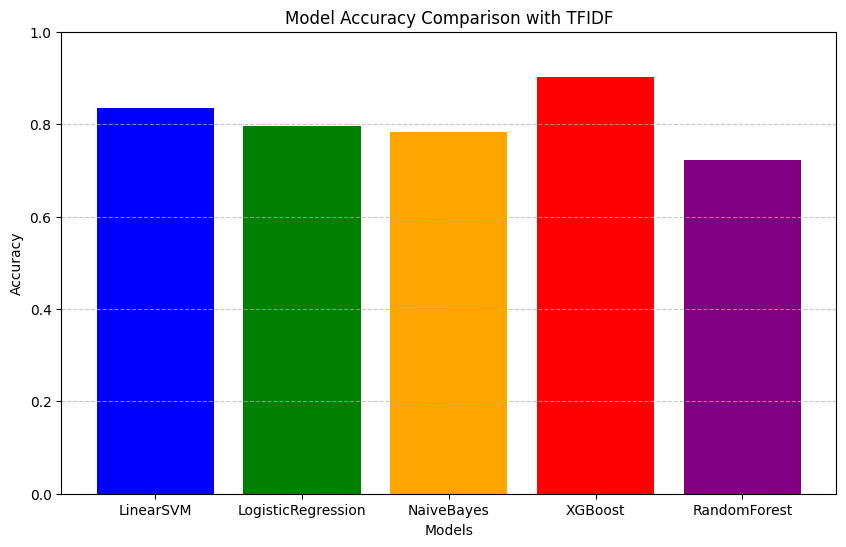

In [150]:
import matplotlib.pyplot as plt

model_names = ['LinearSVM', 'LogisticRegression', 'NaiveBayes', 'XGBoost', 'RandomForest']
model_accuracies = [accuracy_svm, accuracy_lr, accuracy_nb, accuracy_xgboost, accuracy_rfc]

plt.figure(figsize=(10, 6))
plt.bar(model_names, model_accuracies, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison with TFIDF")
plt.ylim(0.0, 1.0)  # Set the y-axis limits
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 2. Universal Sentence Encoder

In [ ]:
%pip install tensorflow_hub

In [ ]:
svm_classifier = LinearSVC()
logistic_regression = LogisticRegression(max_iter=1000)
nb_classifier = MultinomialNB()
xgboost_classifier = XGBClassifier()

def evaluate_model(model, xtest, ytest):
    # Make predictions using the model
    y_pred = model.predict(xtest)

    # Calculate accuracy
    accuracy = accuracy_score(ytest, y_pred)
    # Calculate precision
    precision = precision_score(ytest, y_pred)
    # Calculate recall
    recall = recall_score(ytest, y_pred)
    # Calculate f1 score
    f1 = f1_score(ytest, y_pred)
    # Generate a classification report and confusion matrix
    report = classification_report(ytest, y_pred)
    cm = confusion_matrix(ytest, y_pred)
    return y_pred, accuracy, precision, recall, f1, report, cm

batch_size = 1000


In [190]:
import tensorflow_hub as hub

X = balanced_df['full_content']
y = balanced_df['relevant']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

xtrain_use = []
xtest_use = []

for i in range(0, len(xtrain), batch_size):
    batch_X_train = xtrain[i:i + batch_size]
    batch_X_train_use = np.array(embed(batch_X_train))
    xtrain_use.extend(batch_X_train_use)

for i in range(0, len(xtest), batch_size):
    batch_X_test = xtest[i:i + batch_size]
    batch_X_test_use = np.array(embed(batch_X_test))
    xtest_use.extend(batch_X_test_use)

start = timer()
svm_use = svm_classifier.fit(xtrain_use, ytrain)
print('Required time for training Linear SVM classifier:- ', timer() - start) 
start = timer()
lr_use = logistic_regression.fit(xtrain_use, ytrain)
print('Required time for training Logistic Regression:- ', timer() - start)  
start = timer()
xgboost_use = xgboost_classifier.fit(xtrain_use, ytrain)
print('Required time for training XGBoost classifier:- ', timer() - start) 
start = timer()
rfc_use = random_forest_classifier.fit(xtrain_use, ytrain)
print('Required time for training all Random Forest classifier:- ', timer() - start) 

# Linear SVM
y_pred_svm_use, accuracy_svm_use, precision_svm_use, recall_svm_use, f1_svm_use, report_svm_use, cm_svm_use = evaluate_model(svm_use, xtest_use, ytest)
print(f"LinearSVM (USE) Accuracy: {accuracy_svm_use:.2f}")
print(f"LinearSVM (USE) Precision: {precision_svm_use:.2f}")
print(f"LinearSVM (USE) Recall: {recall_svm_use:.2f}")
print(f"LinearSVM (USE) F1 score: {f1_svm_use:.2f}")
print("Classification Report:")
print(report_svm_use)
print("Confusion Matrix")
print(cm_svm_use)

# Logistic regression
y_pred_lr_use, accuracy_lr_use, precision_lr_use, recall_lr_use, f1_lr_use, report_lr_use, cm_lr_use = evaluate_model(lr_use, xtest_use, ytest)
print(f"Logistic Regression (USE) Accuracy: {accuracy_lr_use:.2f}")
print(f"Logistic Regression (USE) Precision: {precision_lr_use:.2f}")
print(f"Logistic Regression (USE) Recall: {recall_lr_use:.2f}")
print(f"Logistic Regression (USE) F1 score: {f1_lr_use:.2f}")
print("Classification Report:")
print(report_lr_use)
print("Confusion Matrix")
print(cm_lr_use)

# XGBoost 
y_pred_xgboost_use, accuracy_xgboost_use, precision_xgboost_use, recall_xgboost_use, f1_xgboost_use, report_xgboost_use, cm_xgboost_use = evaluate_model(xgboost_use, xtest_use, ytest)
print(f"XGBoost (USE) Accuracy: {accuracy_xgboost_use:.2f}")
print(f"XGBoost (USE) Precision: {precision_xgboost_use:.2f}")
print(f"XGBoost (USE) Recall: {recall_xgboost_use:.2f}")
print(f"XGBoost (USE) F1 score: {f1_xgboost_use:.2f}")
print("Classification Report:")
print(report_xgboost_use)
print("Confusion Matrix:")
print(cm_xgboost_use)



Required time for training Linear SVM classifier:-  0.07736399996792898
Required time for training Logistic Regression:-  0.02692239999305457
Required time for training XGBoost classifier:-  1.6431156999897212
Required time for training all Random Forest classifier:-  0.2063522000098601
LinearSVM (USE) Accuracy: 0.81
LinearSVM (USE) Precision: 0.73
LinearSVM (USE) Recall: 0.60
LinearSVM (USE) F1 score: 0.66
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       283
           1       0.73      0.60      0.66       129

    accuracy                           0.81       412
   macro avg       0.78      0.75      0.76       412
weighted avg       0.80      0.81      0.80       412

Confusion Matrix
[[255  28]
 [ 52  77]]
Logistic Regression (USE) Accuracy: 0.78
Logistic Regression (USE) Precision: 0.72
Logistic Regression (USE) Recall: 0.50
Logistic Regression (USE) F1 score: 0.59
Classification Report:
             

##### Testing with the highest f1 score model

In [191]:
%pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [194]:
import os
import numpy as np
import pandas as pd
import tensorflow_hub as hub
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import joblib  # For saving and loading the model

# Define the folder to save the model
model_folder = "models_saic"
os.makedirs(model_folder, exist_ok=True)
model_path = os.path.join(model_folder, "xgboost_use_model.pkl")

# Function to evaluate the model
def evaluate_model(model, xtest, ytest):
    y_pred = model.predict(xtest)
    accuracy = accuracy_score(ytest, y_pred)
    precision = precision_score(ytest, y_pred)
    recall = recall_score(ytest, y_pred)
    f1 = f1_score(ytest, y_pred)
    report = classification_report(ytest, y_pred)
    cm = confusion_matrix(ytest, y_pred)
    return y_pred, accuracy, precision, recall, f1, report, cm

# Load Universal Sentence Encoder
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Prepare data
X = balanced_df['full_content']
y = balanced_df['relevant']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Batch processing for embedding
batch_size = 1000
xtrain_use = []
xtest_use = []

for i in range(0, len(xtrain), batch_size):
    batch_X_train = xtrain[i:i + batch_size]
    batch_X_train_use = np.array(embed(batch_X_train))
    xtrain_use.extend(batch_X_train_use)

for i in range(0, len(xtest), batch_size):
    batch_X_test = xtest[i:i + batch_size]
    batch_X_test_use = np.array(embed(batch_X_test))
    xtest_use.extend(batch_X_test_use)

# Convert to numpy arrays
xtrain_use = np.array(xtrain_use)
xtest_use = np.array(xtest_use)

# Train XGBoost classifier
xgboost_classifier = XGBClassifier()
xgboost_use = xgboost_classifier.fit(xtrain_use, ytrain)

# Save the trained model
joblib.dump(xgboost_use, model_path)
print(f"Model saved at: {model_path}")

# Evaluate the model
y_pred_xgboost_use, accuracy_xgboost_use, precision_xgboost_use, recall_xgboost_use, f1_xgboost_use, report_xgboost_use, cm_xgboost_use = evaluate_model(xgboost_use, xtest_use, ytest)

print(f"\nXGBoost Model Evaluation:")
print(f"Accuracy: {accuracy_xgboost_use:.2f}")
print(f"Precision: {precision_xgboost_use:.2f}")
print(f"Recall: {recall_xgboost_use:.2f}")
print(f"F1 Score: {f1_xgboost_use:.2f}")
print("\nClassification Report:\n", report_xgboost_use)
print("\nConfusion Matrix:\n", cm_xgboost_use)




Model saved at: models_saic\xgboost_use_model.pkl

XGBoost Model Evaluation:
Accuracy: 0.82
Precision: 0.78
Recall: 0.60
F1 Score: 0.68

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       283
           1       0.78      0.60      0.68       129

    accuracy                           0.82       412
   macro avg       0.81      0.76      0.78       412
weighted avg       0.82      0.82      0.82       412


Confusion Matrix:
 [[261  22]
 [ 51  78]]
Model loaded successfully.

Sample Text: '
covid covidcovidcovidcovidcovid covid covid covid'
Predicted Label (1 = Relevant, 0 = Irrelevant): 0


In [198]:
# Function to test the model on a sample
def test_sample(sample_text, model_path, embed):
    # Load the saved model
    model = joblib.load(model_path)
    print("Model loaded successfully.")

    # Generate embeddings for the sample text
    sample_embedding = np.array(embed([sample_text]))

    # Predict relevance
    prediction = model.predict(sample_embedding)
    return prediction[0]

# Test on a sample text
sample_text = f"""
The new Covid corruption commissioner has started an investigation into personal protective equipment (PPE) fraud.

Tom Hayhoe's first task will be reviewing the £8.7bn of PPE bought during the pandemic that then had to be written off the government's books.

Mr Hayhoe is also likely to review the previous government's abandoning of attempts to reclaim money from deals worth £674m.

The National Crime Agency is separately investigating possible criminal offences committed in the PPE procurement system.

Chris Wormald to become new civil service head
Who is new Cabinet Secretary Chris Wormald?
UK failed to stockpile crucial protective kit
Chancellor Rachel Reeves has asked him to try to recover the public money lost to fraud and underperforming contracts using his experience in procurement as the former chair of an NHS trust.

A Treasury source said: "The chancellor has been clear that she wants this money - that belongs to the British people, and belongs in our public services like our NHS, schools, and police – back.

"She won’t let fraudsters who sought to profit off the back of a national emergency line their pockets.

"Tom Hayhoe brings a wealth of experience and will leave no stone unturned as a commissioner with free rein to investigate the unacceptable carnival of waste and fraud during the pandemic."

The Department for Health and Social Care (DHSC) lost three-quarters of the £12bn it spent on PPE in the first year of the pandemic, largely due to inflated prices and kit that did not meet requirements.

The civil servant who presided over the DHSC during the pandemic, Sir Chris Wormald, has now been appointed to be the UK's most senior civil servant - the Cabinet Secretary.

One prominent company that was awarded government PPE contracts worth more than £200 million through a so-called "VIP lane" was PPE Medpro, linked to Baroness Michelle Mone.

Her husband has since accused the government of trying to "scapegoat" the couple for its own failures, instead blaming the DHSC and calling for the resignation of its top civil servant, Sir Chris.

Labour had a manifesto commitment to appoint a fixed-term commissioner and use every means possible to recoup public money lost in pandemic-related fraud and from contracts which have not been delivered.

Mr Hayhoe's contract is for one year, supported by a small team within the Treasury, and he will report to Reeves directly.

He will submit a report at the end of his contract with lessons and recommendations for government procurement in the face of future crises.
"""
predicted_label = test_sample(sample_text, model_path, embed)
print(f"\nSample Text: '{sample_text}'")
print(f"Predicted Label (1 = Relevant, 0 = Irrelevant): {predicted_label}")

Model loaded successfully.

Sample Text: '
The new Covid corruption commissioner has started an investigation into personal protective equipment (PPE) fraud.

Tom Hayhoe's first task will be reviewing the £8.7bn of PPE bought during the pandemic that then had to be written off the government's books.

Mr Hayhoe is also likely to review the previous government's abandoning of attempts to reclaim money from deals worth £674m.

The National Crime Agency is separately investigating possible criminal offences committed in the PPE procurement system.

Chris Wormald to become new civil service head
Who is new Cabinet Secretary Chris Wormald?
UK failed to stockpile crucial protective kit
Chancellor Rachel Reeves has asked him to try to recover the public money lost to fraud and underperforming contracts using his experience in procurement as the former chair of an NHS trust.

A Treasury source said: "The chancellor has been clear that she wants this money - that belongs to the British people, 

## Using USE with Neural Network training

In [199]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder


# Encode labels
le = LabelEncoder()
balanced_df['relevant'] = le.fit_transform(balanced_df['relevant'])

# Split the data
X = balanced_df['full_content']
y = balanced_df['relevant']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 2: Embed Sentences using Universal Sentence Encoder
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
X_train_embeddings = torch.tensor(np.array(embed(X_train.tolist())), dtype=torch.float32)
X_val_embeddings = torch.tensor(np.array(embed(X_val.tolist())), dtype=torch.float32)
X_test_embeddings = torch.tensor(np.array(embed(X_test.tolist())), dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_val = torch.tensor(y_val.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

# Step 3: Create DataLoader
train_dataset = TensorDataset(X_train_embeddings, y_train)
val_dataset = TensorDataset(X_val_embeddings, y_val)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Step 4: Define Neural Network
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return self.softmax(x)

# Initialize the model
input_size = X_train_embeddings.shape[1]
hidden_size = 128
num_classes = len(le.classes_)
model = SimpleNN(input_size, hidden_size, num_classes)

# Step 5: Define Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Step 6: Train the Model
num_epochs = 10
best_val_loss = float('inf')
model_folder = "models_saic"
os.makedirs(model_folder, exist_ok=True)
model_save_path = os.path.join(model_folder, "USE_nn_model.pkl")

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for batch in train_loader:
        embeddings, labels = batch

        # Forward pass
        outputs = model(embeddings)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
    
    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            embeddings, labels = batch
            outputs = model(embeddings)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    
    # Save the best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), model_save_path)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

# Step 7: Test the Model
model.load_state_dict(torch.load(model_save_path))
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_embeddings)
    test_predictions = torch.argmax(test_outputs, dim=1)
    accuracy = accuracy_score(y_test, test_predictions)

print("\nTest Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, test_predictions))


Epoch [1/10], Train Loss: 28.5778, Val Loss: 5.7744
Epoch [2/10], Train Loss: 25.2132, Val Loss: 5.4191
Epoch [3/10], Train Loss: 24.1400, Val Loss: 5.3069
Epoch [4/10], Train Loss: 23.5540, Val Loss: 5.2299
Epoch [5/10], Train Loss: 23.0092, Val Loss: 5.2592
Epoch [6/10], Train Loss: 22.6937, Val Loss: 5.1518
Epoch [7/10], Train Loss: 22.3529, Val Loss: 5.1144
Epoch [8/10], Train Loss: 22.1672, Val Loss: 5.1010
Epoch [9/10], Train Loss: 22.0290, Val Loss: 5.1944
Epoch [10/10], Train Loss: 21.9201, Val Loss: 5.0804

Test Accuracy: 0.7799352750809061

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       198
           1       0.77      0.55      0.64       111

    accuracy                           0.78       309
   macro avg       0.78      0.73      0.74       309
weighted avg       0.78      0.78      0.77       309



C:\Users\ianwa\AppData\Local\Temp\ipykernel_42652\2738385606.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_save_path))


### Dataset class

In [67]:
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from sentence_transformers import SentenceTransformer, InputExample, losses
from torch.utils.data import DataLoader

sentence_bert_model = SentenceTransformer('all-MiniLM-L6-v2')

batch_size = 64

class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels
        # self.texts_embeddings = sentence_bert_model.encode(self.texts, convert_to_tensor=True)


    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text_embedding = sentence_bert_model.encode(self.texts[idx], convert_to_tensor=True)

        return {
            'text': text_embedding,
            'label': self.labels[idx]
        }
    
train_texts, test_texts, train_labels, test_labels = train_test_split(
    balanced_df['full_content'], balanced_df['relevant'], test_size=0.2, random_state=42
)

# Prepare Dataset and DataLoader
train_dataset = TextDataset(train_texts.tolist(), train_labels.tolist())
test_dataset = TextDataset(test_texts.tolist(), test_labels.tolist())

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

### Train and Eval

#### Sentencebert

In [182]:
balanced_df['full_content'][2000]

'Agencies China flag Shanghai: A year after historic protests broke out on  Shanghai \'s bustling Wulumuqi Road, only a subtly increased  police  presence on main junctions betrays anything out of the ordinary. But for many involved in what became  China \'s most widespread  demonstrations  in decades, it\'s impossible to erase the memory of the events of last autumn. In the early hours of November 27, 2022, vigils for victims of a fire in Xinjiang\'s capital Urumqi morphed into multi-city calls to end zero-Covid measures, and even in some cases topple the ruling  Communist Party  and leader  Xi Jinping . Authorities responded by cracking down. But in early December they abruptly lifted the strict health restrictions that had dominated people\'s lives for almost three years. "Shortly after zero-Covid lifted, everyone just got back to their normal daily life. Everyone just seems to have moved on, no one\'s talking about it," said Li, a protester in their twenties whose name has been cha

In [174]:
# Install required libraries
# !pip install pandas torch sentence-transformers scikit-learn

import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Create a DataFrame for the Dataset

print("Dataset:\n", balanced_df)

# Step 2: Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    balanced_df['full_content'], balanced_df['relevant'], test_size=0.2, random_state=42
)

# Step 3: Load SBERT Model and Generate Embeddings
sbert_model = SentenceTransformer("all-MiniLM-L6-v2")
X_train_embeddings = torch.tensor(sbert_model.encode(X_train.tolist()))
X_test_embeddings = torch.tensor(sbert_model.encode(X_test.tolist()))
y_train = torch.tensor(y_train.values)
y_test = torch.tensor(y_test.values)

# Step 4: Prepare DataLoader
train_dataset = TensorDataset(X_train_embeddings, y_train)
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)

# Step 5: Define Neural Network
class SimpleClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Initialize the model
input_size = X_train_embeddings.shape[1]
hidden_size = 64
num_classes = 2
model = SimpleClassifier(input_size, hidden_size, num_classes)

# Step 6: Define Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Step 7: Training Loop with Epochs
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        embeddings, labels = batch

        # Forward pass
        outputs = model(embeddings)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss:.4f}")

# Step 8: Evaluate the Model
model.eval()
with torch.no_grad():
    outputs = model(X_test_embeddings)
    predictions = torch.argmax(outputs, dim=1)
    accuracy = accuracy_score(y_test, predictions)

print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, predictions))

# # Step 9: Example Predictions
# sample_texts = [
#     "The government announces new policies to boost the economy.",
#     "I went hiking in the mountains last weekend.",
#     "China is also the only country that organised experts to share traceability progress with the WHO on many occasions, Mao Ning, spokesperson at the foreign ministry, told a regular news conference. In a statement on Monday, the WHO again asked China to share data and access to assist its efforts to understand the origins of COVID-19, the first cases of which were detected in central China five years ago."
# ]
# sample_embeddings = torch.tensor(sbert_model.encode(sample_texts))
# with torch.no_grad():
#     sample_outputs = model(sample_embeddings)
#     sample_predictions = torch.argmax(sample_outputs, dim=1)

# for text, pred in zip(sample_texts, sample_predictions):
#     print(f"Text: {text}\nPrediction: {'Relevant' if pred == 1 else 'Not Relevant'}\n")


Dataset:
       article_id         source_name  \
0         155465  The Times of India   
1         441303  The Times of India   
2         177431  The Times of India   
3         646394       GlobeNewswire   
4         208890  The Times of India   
...          ...                 ...   
2051      757435       GlobeNewswire   
2052      757438       GlobeNewswire   
2053      757439       GlobeNewswire   
2054      757447  The Times of India   
2055      757448  The Times of India   

                                                  title  \
0     Investing Lessons from ICC Cricket World Cup 2023   
1        9 reasons why ESG investing is getting popular   
2     Info Edge Q2 Results: Profit rises 24% YoY to ...   
3     Demand for Effective Packaging in the Food Ind...   
4     Inside pics; Khushi Kapoor's birthday celebration   
...                                                 ...   
2051  BioCryst Announces Approval of ORLADEYO® (bero...   
2052  Medical Literature Monitoring S

In [186]:
import torch
from sentence_transformers import SentenceTransformer
import torch.nn.functional as F

# Save the trained model
model_save_path = "trained_simple_classifier.pth"
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

# Function to preprocess and predict on new data
def predict_relevance(model, text, sbert_model, threshold=0.5):
    """
    Predicts the relevance of a given text using the trained model.

    Args:
        model: The trained PyTorch model.
        text: A string containing the input news article.
        sbert_model: SentenceTransformer model for encoding.
        threshold: Probability threshold for relevance classification.

    Returns:
        predicted_class: 1 if relevant, 0 if irrelevant.
        probability: Probability of relevance.
    """
    # Encode the text using SBERT
    encoded_text = torch.tensor(sbert_model.encode([text]))
    
    # Forward pass through the model
    model.eval()
    with torch.no_grad():
        outputs = model(encoded_text)
        probabilities = F.softmax(outputs, dim=1)
        probability = probabilities[0][1].item()  # Probability of being relevant
        predicted_class = int(probability >= threshold)
    
    return predicted_class, probability

# Load the model for testing
loaded_model = SimpleClassifier(input_size, hidden_size, num_classes)
loaded_model.load_state_dict(torch.load(model_save_path))
loaded_model.eval()
print("Model loaded for testing.")

# Load SBERT for encoding new text
sbert_model = SentenceTransformer("all-MiniLM-L6-v2")

# Test on a new sample text
sample_text = f"""SINGAPORE: The committee which determines the electoral boundaries ahead of each general election has not been formed, the Elections Department (ELD) said on Thursday (Jan 2).

“The Electoral Boundaries Review Committee (EBRC) has not been convened,” it said in response to queries from CNA.

The committee is convened ahead of every contest to review and make changes to Singapore’s electoral map, taking into account population shifts and housing developments to adjust the number of voters across electoral divisions.

The next general election must be held by Nov 23 this year.

It will be Singapore’s 14th since independence, and the first under the country’s fourth-generation leadership led by Prime Minister Lawrence Wong.

"STILL SEVERAL MONTHS TO WORK WITH"
National University of Singapore associate professor of political science Chong Ja Ian said that even though the EBRC has not been formed, it does not mean the ruling People's Action Party (PAP) is "cutting things close".

"When exactly to hold a GE is at the discretion of the ruling party so long as it is within the timeframe for elections," he said, adding that there are "still several months to work with".

"In the past, the committee could complete its work in a few weeks. They could probably do so again. A GE can be held shortly after that," he said.

"Working backwards, the latest time the EBRC needs to be convened is probably September or October."

Independent observer Felix Tan, who has written about Singapore’s political landscape, said that Mr Wong "might want to ensure that the Budget is effectively done and dusted in February before he calls for the EBRC to be formed".

"If it’s formed in February, one can give them one to three months to churn out a report. This might then put the GE to be held in May or early June," he said.

Dr Tan said that political parties should not wait until the general election is called before introducing possible candidates.

"After all, a GE will definitely be held this year, so why should there be any hesitation to release their manifesto and candidates earlier?"

Early announcements by parties will also allow Singaporeans to familiarise themselves with the candidates, "before they become fodder for gossip and derision on social media outlets, which can be unforgiving and toxic to say the least", added Dr Tan.

Related:

Govt rejects opposition MPs' electoral boundary suggestions, says EBRC is free from political intervention
DURATION OF THE EBRC’S WORK
Assoc Prof Chong added that even if the EBRC is convened earlier in the year, it may not have a direct bearing on the exact date of the election. For example, in 2015, the electoral contest took place several months after the release of the EBRC report, he said.

In the four contests called by Mr Wong’s predecessor — in 2006, 2011, 2015 and 2020 — the gap from the EBRC’s formation to the election being called ranged between two and almost 11 months.

The committee was last convened in August 2019, ahead of a general election in July the following year, held amid the COVID-19 pandemic.

In 2015, it was convened in May, with a September election held in what was Singapore’s Golden Jubilee year.

Chaired by the secretary to the prime minister, the EBRC comprises senior civil servants from the Housing and Development Board, Singapore Land Authority, Department of Statistics and ELD.

The formation of the committee will be a next step in the lead-up to Singapore’s next electoral contest.

In March last year, the ELD said about 50,000 public officers would be appointed and trained to manage nomination, polling and counting activities ahead of the next general election.

Then Prime Minister Lee Hsien Loong’s May Day Rally last year — his final major speech before handing over the reins — was seen by political analysts as an election campaign speech, as he summed up the PAP government’s achievements during his 20-year tenure.

Shortly after taking office, newly minted leader Mr Wong directed the ELD on May 20 to revise Singapore's registers of electors by the end of July.

In June, the boundaries of polling districts in 12 constituencies were changed and gazetted.

The nation’s voter rolls were then updated and open for public inspection in late July, revealing that over 2.7 million Singaporeans will be eligible to vote in the next general election."""
predicted_class, probability = predict_relevance(loaded_model, sample_text, sbert_model)

print(f"\nSample Text: {sample_text}")
print(f"Predicted Class: {'Relevant' if predicted_class == 1 else 'Irrelevant'}")
print(f"Probability of relevance: {probability:.4f}")

Model saved to trained_simple_classifier.pth
Model loaded for testing.


C:\Users\ianwa\AppData\Local\Temp\ipykernel_42652\2675711641.py:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(model_save_path))



Sample Text: SINGAPORE: The committee which determines the electoral boundaries ahead of each general election has not been formed, the Elections Department (ELD) said on Thursday (Jan 2).

“The Electoral Boundaries Review Committee (EBRC) has not been convened,” it said in response to queries from CNA.

The committee is convened ahead of every contest to review and make changes to Singapore’s electoral map, taking into account population shifts and housing developments to adjust the number of voters across electoral divisions.

The next general election must be held by Nov 23 this year.

It will be Singapore’s 14th since independence, and the first under the country’s fourth-generation leadership led by Prime Minister Lawrence Wong.

"STILL SEVERAL MONTHS TO WORK WITH"
National University of Singapore associate professor of political science Chong Ja Ian said that even though the EBRC has not been formed, it does not mean the ruling People's Action Party (PAP) is "cutting things clos

In [106]:
##### TEST #####

from sentence_transformers import InputExample


train_examples = [InputExample(texts=[text], label=int(label)) for text, label in zip(pd.Series(tfidf.inverse_transform(X_train.toarray())[0]), y_train)]

train_loader = DataLoader(train_examples, shuffle=True, batch_size=16, collate_fn=sentence_bert_model.smart_batching_collate)




In [124]:
for i in train_loader:
    print(i[1])

tensor([0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0])
tensor([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1])
tensor([1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1])
tensor([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1])
tensor([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])
tensor([1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0])
tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1])
tensor([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1])
tensor([1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1])
tensor([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])
tensor([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0])
tensor([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1])
tensor([1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1])
tensor([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0])
tensor([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])
tensor([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0])
tensor([0, 1, 0, 1, 1, 0, 0, 0,

In [125]:
from sentence_transformers import SentenceTransformer, InputExample, losses
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim

# Step 5: Encoding Strategies
# Using Sentence-BERT Embeddings
# sentence_bert_model = SentenceTransformer('all-MiniLM-L6-v2')
X_train_embeddings = sentence_bert_model.encode(pd.Series(tfidf.inverse_transform(X_train.toarray())[0]), convert_to_tensor=True)
X_val_embeddings = sentence_bert_model.encode(pd.Series(tfidf.inverse_transform(X_val.toarray())[0]), convert_to_tensor=True)
X_test_embeddings = sentence_bert_model.encode(pd.Series(tfidf.inverse_transform(X_test.toarray())[0]), convert_to_tensor=True)

# # Step 6: DataLoader Preparation
# train_examples = [InputExample(texts=[text], label=int(label)) for text, label in zip(pd.Series(tfidf.inverse_transform(X_train.toarray())[0]), y_train)]
# train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=16, collate_fn=lambda x: ({'input_ids': sentence_bert_model.tokenize([ex.texts[0] for ex in x])}, torch.tensor([ex.label for ex in x])))

# Step 7: Sentence-BERT Training
# train_loss = losses.SoftmaxLoss(model=sentence_bert_model, sentence_embedding_dimension=sentence_bert_model.get_sentence_embedding_dimension(), num_labels=4)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(sentence_bert_model.parameters(), lr=1e-4)

epochs = 5
for epoch in range(epochs):
    sentence_bert_model.train()
    epoch_loss = 0
    for batch in train_loader:
        print(batch[0])
        # Extract the input data and labels
        sentences = [batch[0][0]['input_ids']]  # List of sentences
        labels = batch[1]  # Corresponding labels
        
        # Compute the sentence embeddings
        embeddings = sentence_bert_model.encode(sentences, convert_to_tensor=True)
        
        # Forward pass: compute predicted outputs by passing embeddings through the model
        optimizer.zero_grad()
        
        # Compute loss
        output = sentence_bert_model(embeddings)
        loss = criterion(output, labels)

        # Backward pass: compute gradient and update weights
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}")

# Step 8: Evaluation
sentence_bert_model.eval()
val_predictions = []
val_labels = []

for text, label in zip(pd.Series(tfidf.inverse_transform(X_val)[0]), y_val):
    embeddings = sentence_bert_model.encode(text, convert_to_tensor=True)
    prediction = torch.argmax(train_loss(embeddings).detach()).item()
    val_predictions.append(prediction)
    val_labels.append(label)

print("Validation Classification Report:")
print(classification_report(val_labels, val_predictions))

# Step 9: Test Set Evaluation
test_predictions = []
test_labels = []

for text, label in zip(pd.Series(tfidf.inverse_transform(X_test)[0]), y_test):
    embeddings = sentence_bert_model.encode(text, convert_to_tensor=True)
    prediction = torch.argmax(train_loss(embeddings).detach()).item()
    test_predictions.append(prediction)
    test_labels.append(label)

print("Test Classification Report:")
print(classification_report(test_labels, test_predictions))


[{'input_ids': tensor([[  101, 16333,   102,     0],
        [  101,  7496,   102,     0],
        [  101,  5211,   102,     0],
        [  101,  5068,   102,     0],
        [  101, 12456,  2386,   102],
        [  101,  4925,   102,     0],
        [  101, 12394,   102,     0],
        [  101, 16189,   102,     0],
        [  101,  2056,   102,     0],
        [  101,  2349,  2015,   102],
        [  101, 11683,   102,     0],
        [  101,  4610,   102,     0],
        [  101,  3143,   102,     0],
        [  101,  2861,   102,     0],
        [  101, 22472,   102,     0],
        [  101,  4248,  4355,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]), 'at

IndexError: too many indices for tensor of dimension 2

In [58]:
def train_epoch(model, data_loader, criterion, optimizer, device):
    model.train()
    losses = []
    correct_predictions = 0
    
    for batch_idx, batch in enumerate(data_loader):
        texts = batch['text']
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(texts)
        
        loss = criterion(outputs, labels)
        _, preds = torch.max(outputs, dim=1)
        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

        # Backpropagation
        loss.backward()
        optimizer.step()

        # Print progress
        print(f"Batch {batch_idx + 1}: Loss = {loss.item():.4f}")
    
    return correct_predictions.double() / len(data_loader.dataset), torch.mean(torch.tensor(losses))

def evaluate_model(model, data_loader, criterion, device):
    model.eval()
    losses = []
    correct_predictions = 0

    with torch.no_grad():
        for batch_idx, batch in enumerate(data_loader):
            texts = batch['text']
            labels = batch['label'].to(device)

            outputs = model(texts)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, dim=1)
            correct_predictions += torch.sum(preds == labels)
            losses.append(loss.item())

            # Print progress
            print(f"Eval Batch {batch_idx + 1}: Loss = {loss.item():.4f}")
    
    return correct_predictions.double() / len(data_loader.dataset), torch.mean(torch.tensor(losses))


### GridSearchCV for hyperparameter tuning

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin
import torch
from torch.utils.data import DataLoader
from torch import nn, optim

# 1. Define a scikit-learn compatible wrapper for your SentenceBertClassifier
class SentenceBertClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model_name='all-MiniLM-L6-v2', dropout=0.3, learning_rate=2e-5):
        self.model_name = model_name
        self.dropout = dropout
        self.learning_rate = learning_rate
        self.model = None
        self.optimizer = None
        self.criterion = nn.CrossEntropyLoss()

    def fit(self, X, y):
        # Create the model and optimizer
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model = SentenceBertClassifier(
            model_name=self.model_name, 
            num_classes=2
        ).to(device)

        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)

        # Convert the input data to DataLoader
        train_dataset = TextDataset(X.tolist(), y.tolist())
        train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

        # Training loop
        for epoch in range(5):  # Training for a fixed number of epochs
            self.model.train()
            for batch in train_loader:
                texts = batch['text']
                labels = batch['label'].to(device)

                self.optimizer.zero_grad()
                outputs = self.model(texts)
                loss = self.criterion(outputs, labels)
                loss.backward()
                self.optimizer.step()

        return self

    def predict(self, X):
        # Convert the input data to DataLoader
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        test_dataset = TextDataset(X.tolist(), [0] * len(X))  # Dummy labels for prediction
        test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

        self.model.eval()
        predictions = []
        with torch.no_grad():
            for batch in test_loader:
                texts = batch['text']
                outputs = self.model(texts)
                _, preds = torch.max(outputs, dim=1)
                predictions.extend(preds.cpu().numpy())

        return predictions

# 2. Define hyperparameters to tune with GridSearchCV
param_grid = {
    'model_name': ['all-MiniLM-L6-v2', 'paraphrase-MiniLM-L6-v2'],
    'dropout': [0.2, 0.3, 0.5],
    'learning_rate': [1e-5, 2e-5, 5e-5]
}

# 3. Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=SentenceBertClassifierWrapper(),
    param_grid=param_grid,
    scoring='accuracy',  # You can change this to 'f1' or other metrics if preferred
    cv=3,  # Number of cross-validation splits
    verbose=1,
    n_jobs=-1  # Use multiple cores for parallel computation
)

# 4. Fit the GridSearchCV on the training data
grid_search.fit(train_texts, train_labels)

# 5. Get the best parameters and evaluate
print("Best parameters found: ", grid_search.best_params_)


Fitting 3 folds for each of 18 candidates, totalling 54 fits


C:\Users\ianwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters found:  {'dropout': 0.2, 'learning_rate': 1e-05, 'model_name': 'all-MiniLM-L6-v2'}


### Execution

In [61]:
from torch import nn, optim


# Initialize Model, Criterion, and Optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SentenceBertClassifier().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=2e-5)

# Training Loop
num_epochs = 10
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    print("-" * 30)

    # Training
    train_acc, train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
    print(f"Training Accuracy: {train_acc:.4f}, Training Loss: {train_loss:.4f}")

    # Evaluation
    eval_acc, eval_loss = evaluate_model(model, test_loader, criterion, device)
    print(f"Evaluation Accuracy: {eval_acc:.4f}, Evaluation Loss: {eval_loss:.4f}")

    print("\n")

Epoch 1/10
------------------------------


TypeError: len() of a 0-d tensor